In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import nltk
nltk.download('punkt')
from nltk import punkt
import seaborn as sns
import scipy.stats as stats

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
df.sample(5)

,target,message,num_characters,num_words,num_sentence
3093,0,Have you emigrated or something? Ok maybe 5.30...,67,14,2
3987,0,Hello. Sort of out in town already. That . So ...,104,27,5
4926,0,Wanna do some art?! :D,22,9,2
4347,0,You give us back my id proof and &lt;#&gt; r...,113,32,3
3655,0,Oh really?? Did you make it on air? What's you...,55,16,3


In [5]:
df.shape

(5572, 5)

#Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#remove last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming features name
df.rename(columns = {'v1' : 'target', 'v2' : 'message'}, inplace = True)

In [10]:
df.sample(5)

,target,message
731,ham,No he didn't. Spring is coming early yay!
5256,ham,Well she's in for a big surprise!
894,ham,Doesn't g have class early tomorrow and thus s...
4337,ham,Yes when is the appt again?
3252,ham,K:)k..its good:)when are you going?


In [11]:
#Lable encoding the Output column

label_encoder = LabelEncoder()
df['target'] = pd.DataFrame(label_encoder.fit_transform(df['target']))


In [12]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check Missing Values
df.isnull().sum()

,0
target,0
message,0


In [14]:
#check Duplicated Values
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()
#duplicates removed successfully

0

In [17]:
df.shape

(5169, 2)

#Exploratory Data Analysis(EDA)

In [18]:
df['num_characters'] = df['message'].apply(len)

In [19]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentence'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
only_ham = df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()
only_ham

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
only_spam = df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()
only_spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


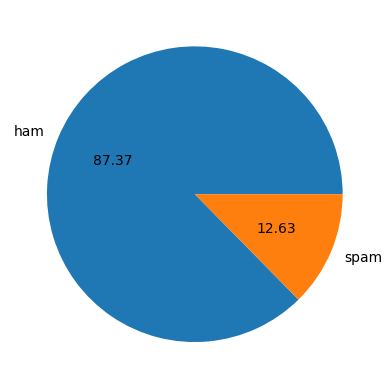

In [27]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

<ipython-input-28-9d303e6d6a3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_characters'])


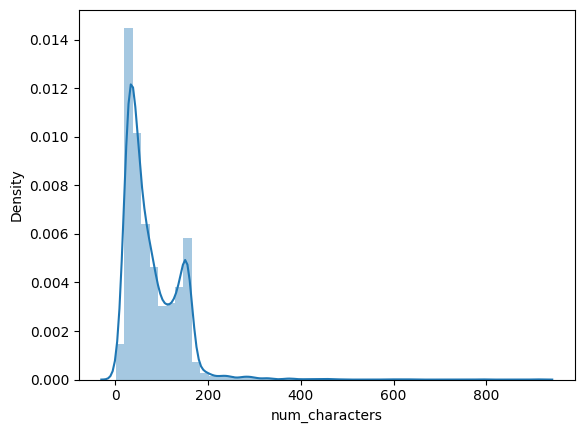

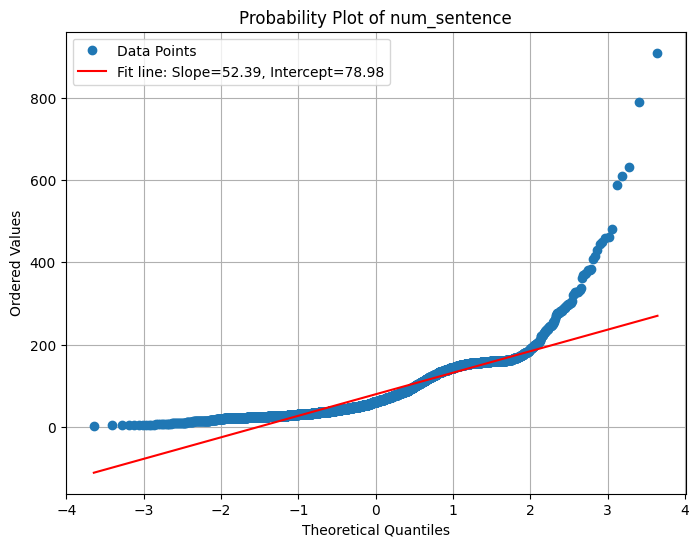

In [28]:
sns.distplot(df['num_characters'])
(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_characters'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-29-451538dd86b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_words'])


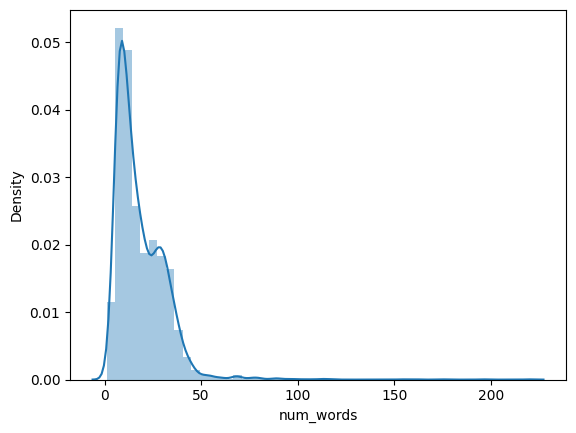

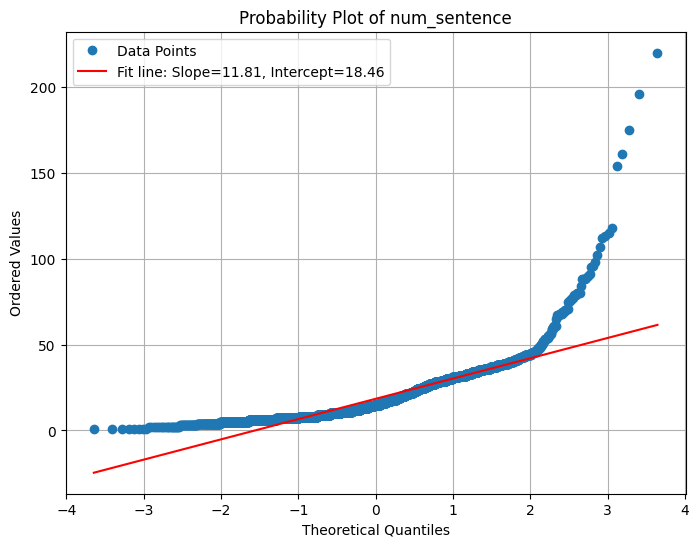

In [29]:
sns.distplot(df['num_words'])
(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_words'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-30-f92f07786461>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_sentence'])


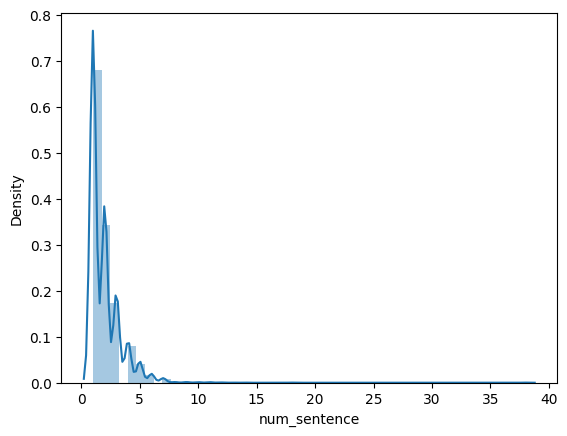

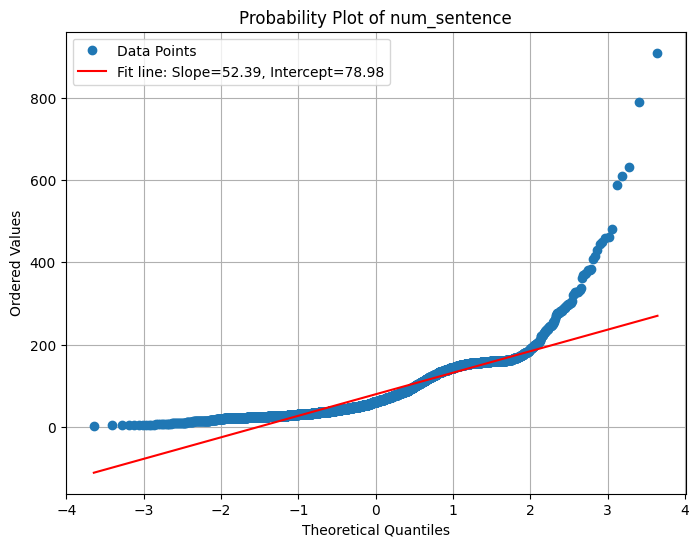

In [30]:
sns.distplot(df['num_sentence'])

(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_characters'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()


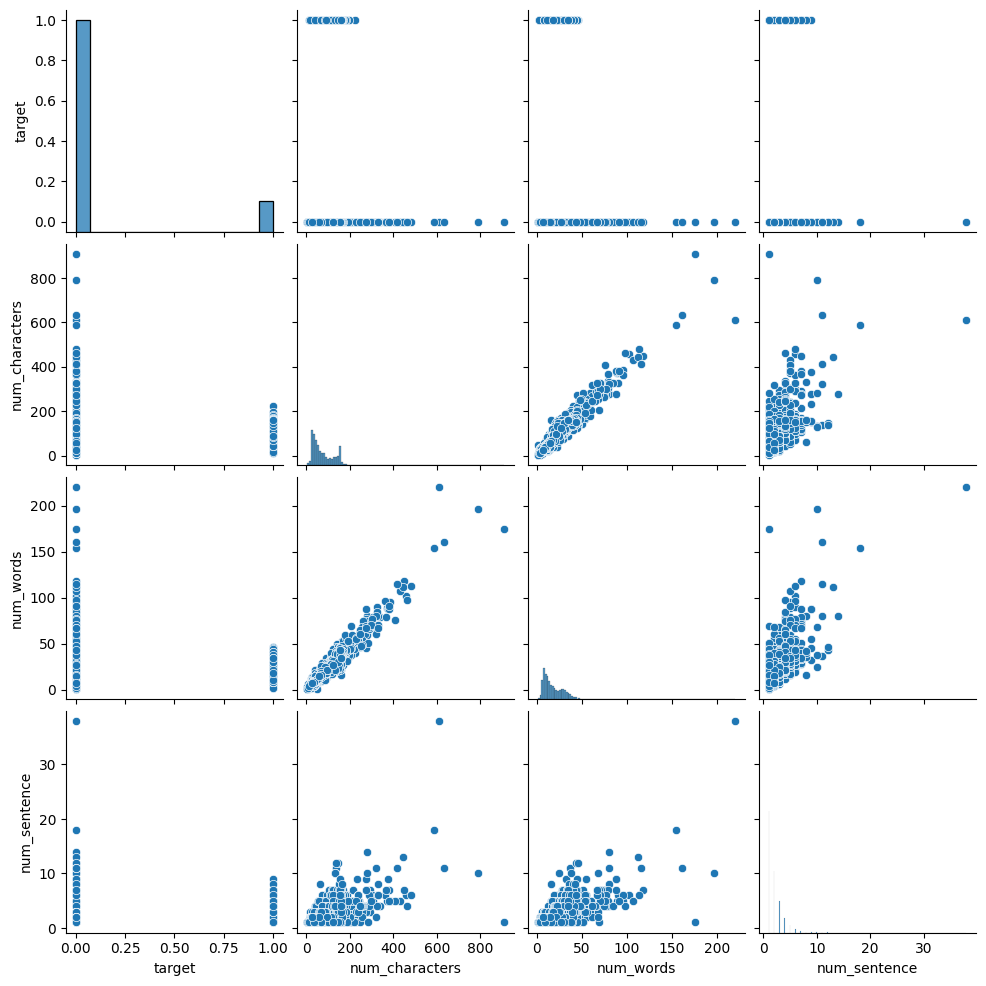

In [40]:
sns.pairplot(df)

In [35]:
df1 = df.drop(columns = ['message'])

<Axes: >

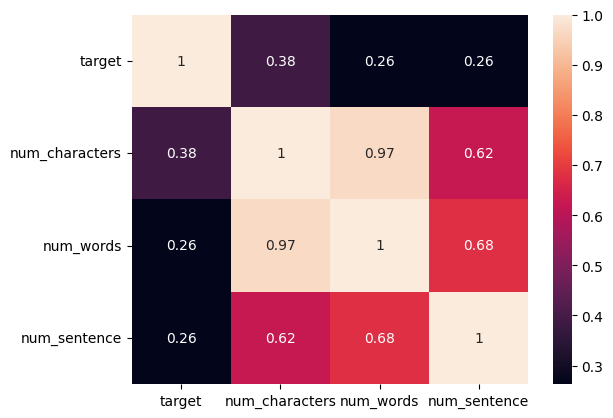

In [39]:
sns.heatmap(df1.corr(), annot=True)